# CORRELATION IN PYTHON

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
from matplotlib.pyplot import figure

%matplotlib inline 

matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.family'] = 'times new roman'
matplotlib.rcParams["font.size"]=20

pd.options.mode.chained_assignment = None



In [7]:
df=pd.read_csv(r"C:\Users\Sweta\Documents\Project\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
#missing data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
#removing missing data

df.dropna(axis=0,how="any",inplace=True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [24]:
#getting data types of columns
df.dtypes

#changing data type of column budget & gross from float to int
df["budget"]=df["budget"].astype("int64")
df["gross"]=df["gross"].astype("int64")

In [25]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [51]:
#creating correct year column(years in released and year column dont match)
df["yearcorrect"]=df["released"].str.extract("([1-3][0-9]{3})")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020


In [55]:
pd.set_option("display.max_rows",None)

In [58]:
# duplicates

#df[df.duplicated(['name'], keep=False)].sort_values(by="name")

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000,115695182,New Line Cinema,95.0,2010
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000,25507137,New Line Cinema,91.0,1984
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000,1050693953,Walt Disney Pictures,128.0,2019
2056,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000,504050219,Walt Disney Pictures,90.0,1992
3196,Anna Karenina,PG-13,Drama,1997,"April 4, 1997 (United States)",6.3,5600.0,Bernard Rose,Lev Tolstoy,Sophie Marceau,United States,35000000,858553,Icon Entertainment International,108.0,1997
6099,Anna Karenina,R,Drama,2012,"September 7, 2012 (United Kingdom)",6.6,95000.0,Joe Wright,Tom Stoppard,Keira Knightley,United Kingdom,40600000,68929150,Universal Pictures,129.0,2012
6471,Annie,PG,Comedy,2014,"December 19, 2014 (United States)",5.3,35000.0,Will Gluck,Will Gluck,Quvenzhané Wallis,United States,65000000,136853506,Marcy Media,118.0,2014
213,Annie,PG,Comedy,1982,"June 18, 1982 (United States)",6.6,41000.0,John Huston,Carol Sobieski,Aileen Quinn,United States,50000000,57063861,Columbia Pictures,127.0,1982
2815,Bad Company,R,Crime,1995,"January 20, 1995 (United States)",5.4,2800.0,Damian Harris,Ross Thomas,Ellen Barkin,United States,15000000,3674841,Touchstone Pictures,108.0,1995
4191,Bad Company,PG-13,Action,2002,"June 7, 2002 (United States)",5.6,45000.0,Joel Schumacher,Gary M. Goodman,Anthony Hopkins,United States,70000000,66200782,Touchstone Pictures,116.0,2002


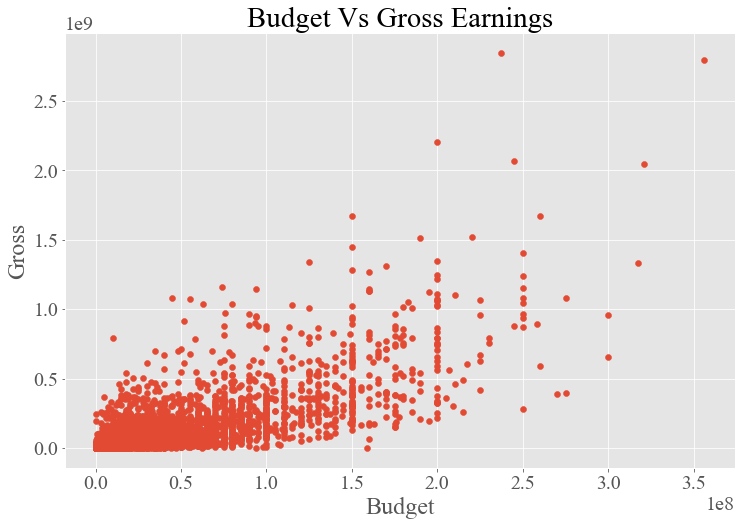

In [79]:
#scatter plot with budget vs gross

plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

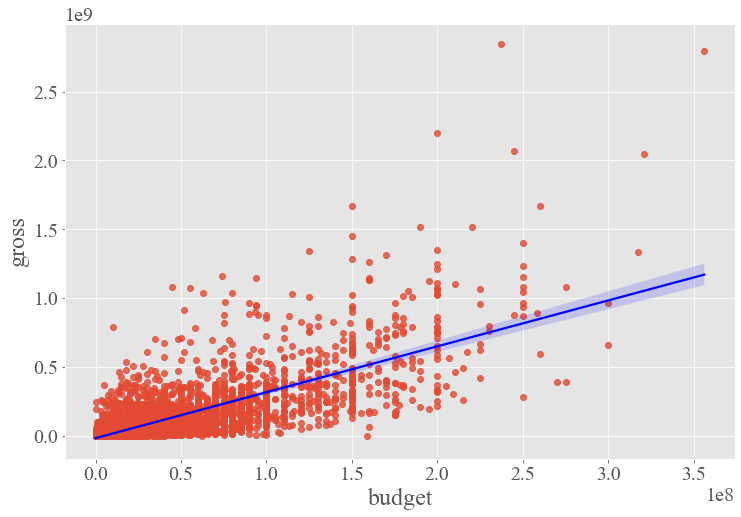

In [96]:
#Plotting budget vs gross using seaborn

sns.regplot(x="budget",y="gross",data=df,line_kws={"color":"blue"})
plt.show()


In [92]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


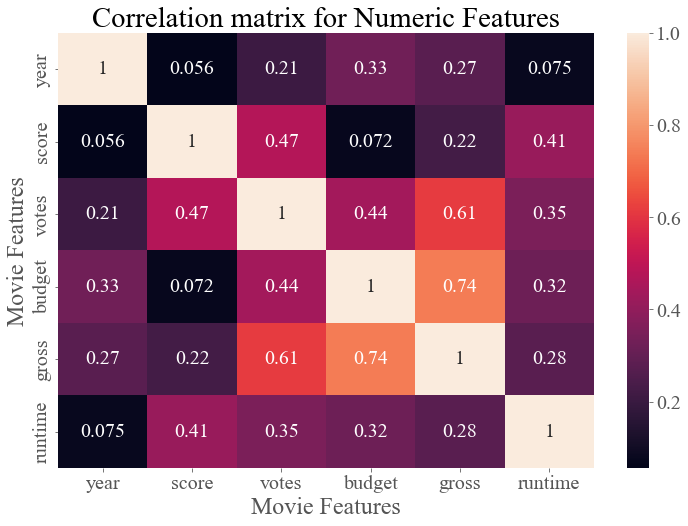

In [98]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

Text(0, 0.5, 'Rating')

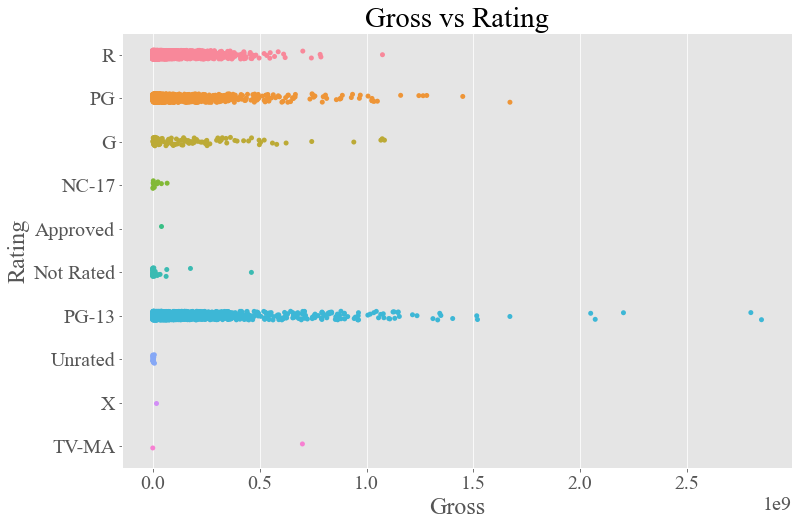

In [103]:
sns.stripplot(x="gross", y="rating", data=df)
plt.title("Gross vs Rating")
plt.xlabel("Gross")
plt.ylabel("Rating")

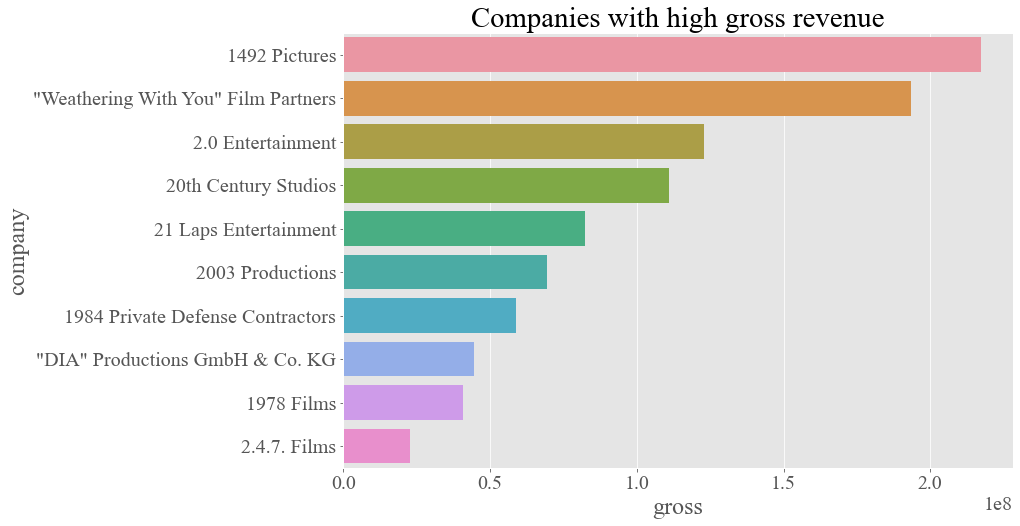

In [136]:
# Looking at the top 10 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()[:15]

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:10]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 


top5=pd.DataFrame({'company':CompanyGrossSumSorted.index, 'gross':CompanyGrossSumSorted.values})
sns.barplot(x="gross",y="company",data=top5)
plt.title("Companies with high gross revenue")
plt.show()

